In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [179]:
# init parameters
m = 5
d = 3
beta = 2

iterations = 1000

In [154]:
losses = []

def get_samples(iterations, beta, m, d):

    X = np.random.normal(0, 1, (m, d))
    theta_true = np.random.normal(0, 1, (d, 1))  

    y = X @ theta_true

    theta = np.random.randint(2, size=d)

    for _ in range(iterations): 
        pos = np.random.randint(0, d)
        theta1 = theta.copy()
        theta1[pos] = not theta[pos]

        comp = np.exp(-beta *(2 * y.T @ (X @ (theta - theta1))  + (X @ theta) @ (X @ theta).T - (X @ theta1) @ (X @ theta1).T))[0]
        acceptance = min(1, comp)

        # change state with acceptance probability
        if np.random.rand(1)[0] < acceptance: 
            theta = theta1

        mse = (2/d) * ((theta_true - theta) ** 2).mean()  
        losses.append(mse)

        return losses


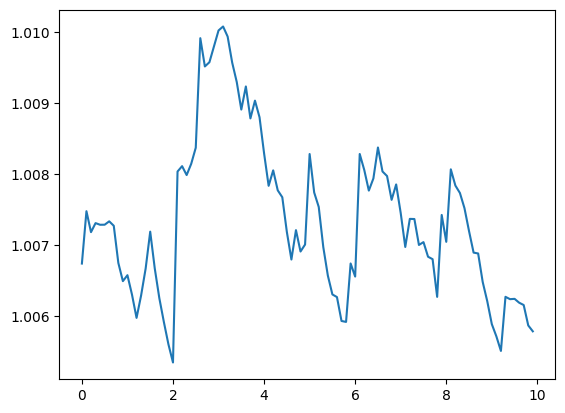

In [178]:

losses_b = []
betas =  np.arange(0, 10, 0.1)


for beta_value in betas: 
    losses_b.append(np.mean(get_samples(iterations, beta_value, m, d)))

plt.plot(betas, losses_b) # always changes

/tmp/ipykernel_26821/702342257.py:17: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta *(2 * y.T @ (X @ (theta - theta1))  + (X @ theta) @ (X @ theta).T - (X @ theta1) @ (X @ theta1).T))[0]


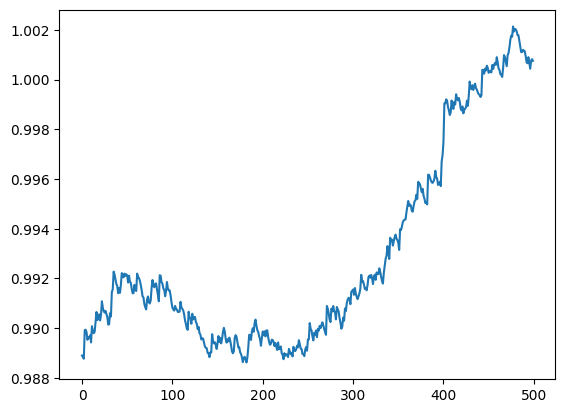

In [182]:

losses_m = []

m_values = list(range(500))
for m_value in m_values: 
    losses_m.append(np.mean(get_samples(iterations, beta, m_value, d)))

plt.plot(m_values, losses_m) # always changes
